In [1]:
#Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [3]:
pharma_data.describe(include='all')

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23084,23097.000000,23097.000000,23097,23097,23097,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
unique,NaN,NaN,NaN,32,NaN,NaN,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,DX6,NaN,NaN,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,8606,NaN,NaN,13246,16134,23097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16545.712041,26.413127,6261.280772,NaN,33.209768,23.454820,NaN,NaN,NaN,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,NaN,19.549882,3.807661,NaN,NaN,NaN,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,NaN,0.000000,1.089300,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,NaN,16.000000,20.205550,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,NaN,33.000000,23.386199,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,NaN,50.000000,26.788154,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000


In [4]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [5]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [6]:
# creating a copy of training dataset to work with
df = pharma_data.copy()
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


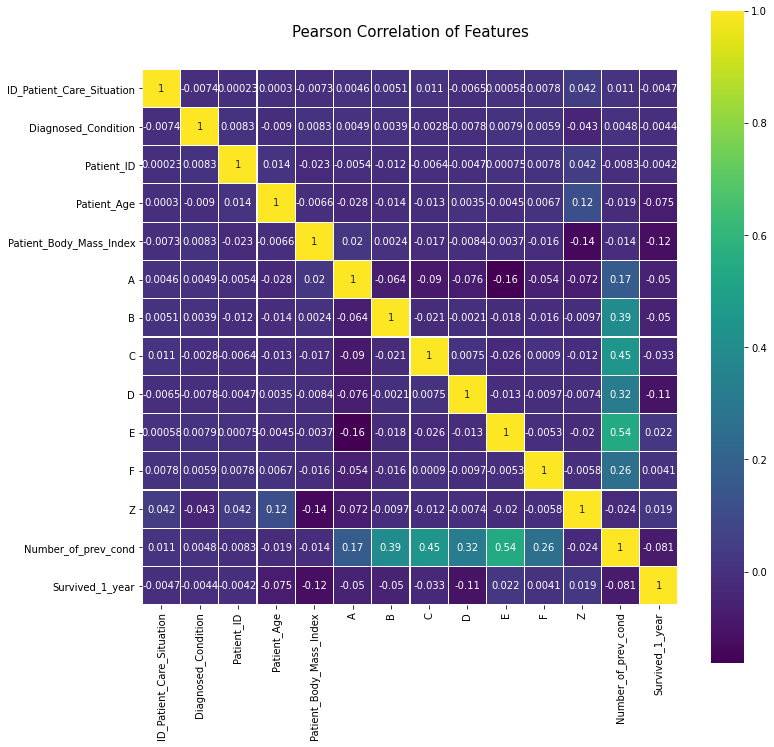

In [7]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
y=df['Survived_1_year']
x=df.drop(pharma_data.columns[-1], axis = 1)

In [8]:
#Handling of missing data
df['Number_of_prev_cond'] = df['Number_of_prev_cond'].fillna(df['Number_of_prev_cond'].mode()[0])  # filling the missing value of 'Number_of_prev_cond'
df['Treated_with_drugs']=df['Treated_with_drugs'].fillna(df['Treated_with_drugs'].mode()[0])

In [9]:
df['A'].fillna(df['A'].mode()[0], inplace = True)
df['B'].fillna(df['B'].mode()[0], inplace = True)
df['C'].fillna(df['C'].mode()[0], inplace = True)
df['D'].fillna(df['D'].mode()[0], inplace = True)
df['E'].fillna(df['E'].mode()[0], inplace = True)
df['F'].fillna(df['F'].mode()[0], inplace = True)
df['Z'].fillna(df['Z'].mode()[0], inplace = True)

In [10]:
df.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5aadecb50>,
      dtype=object)

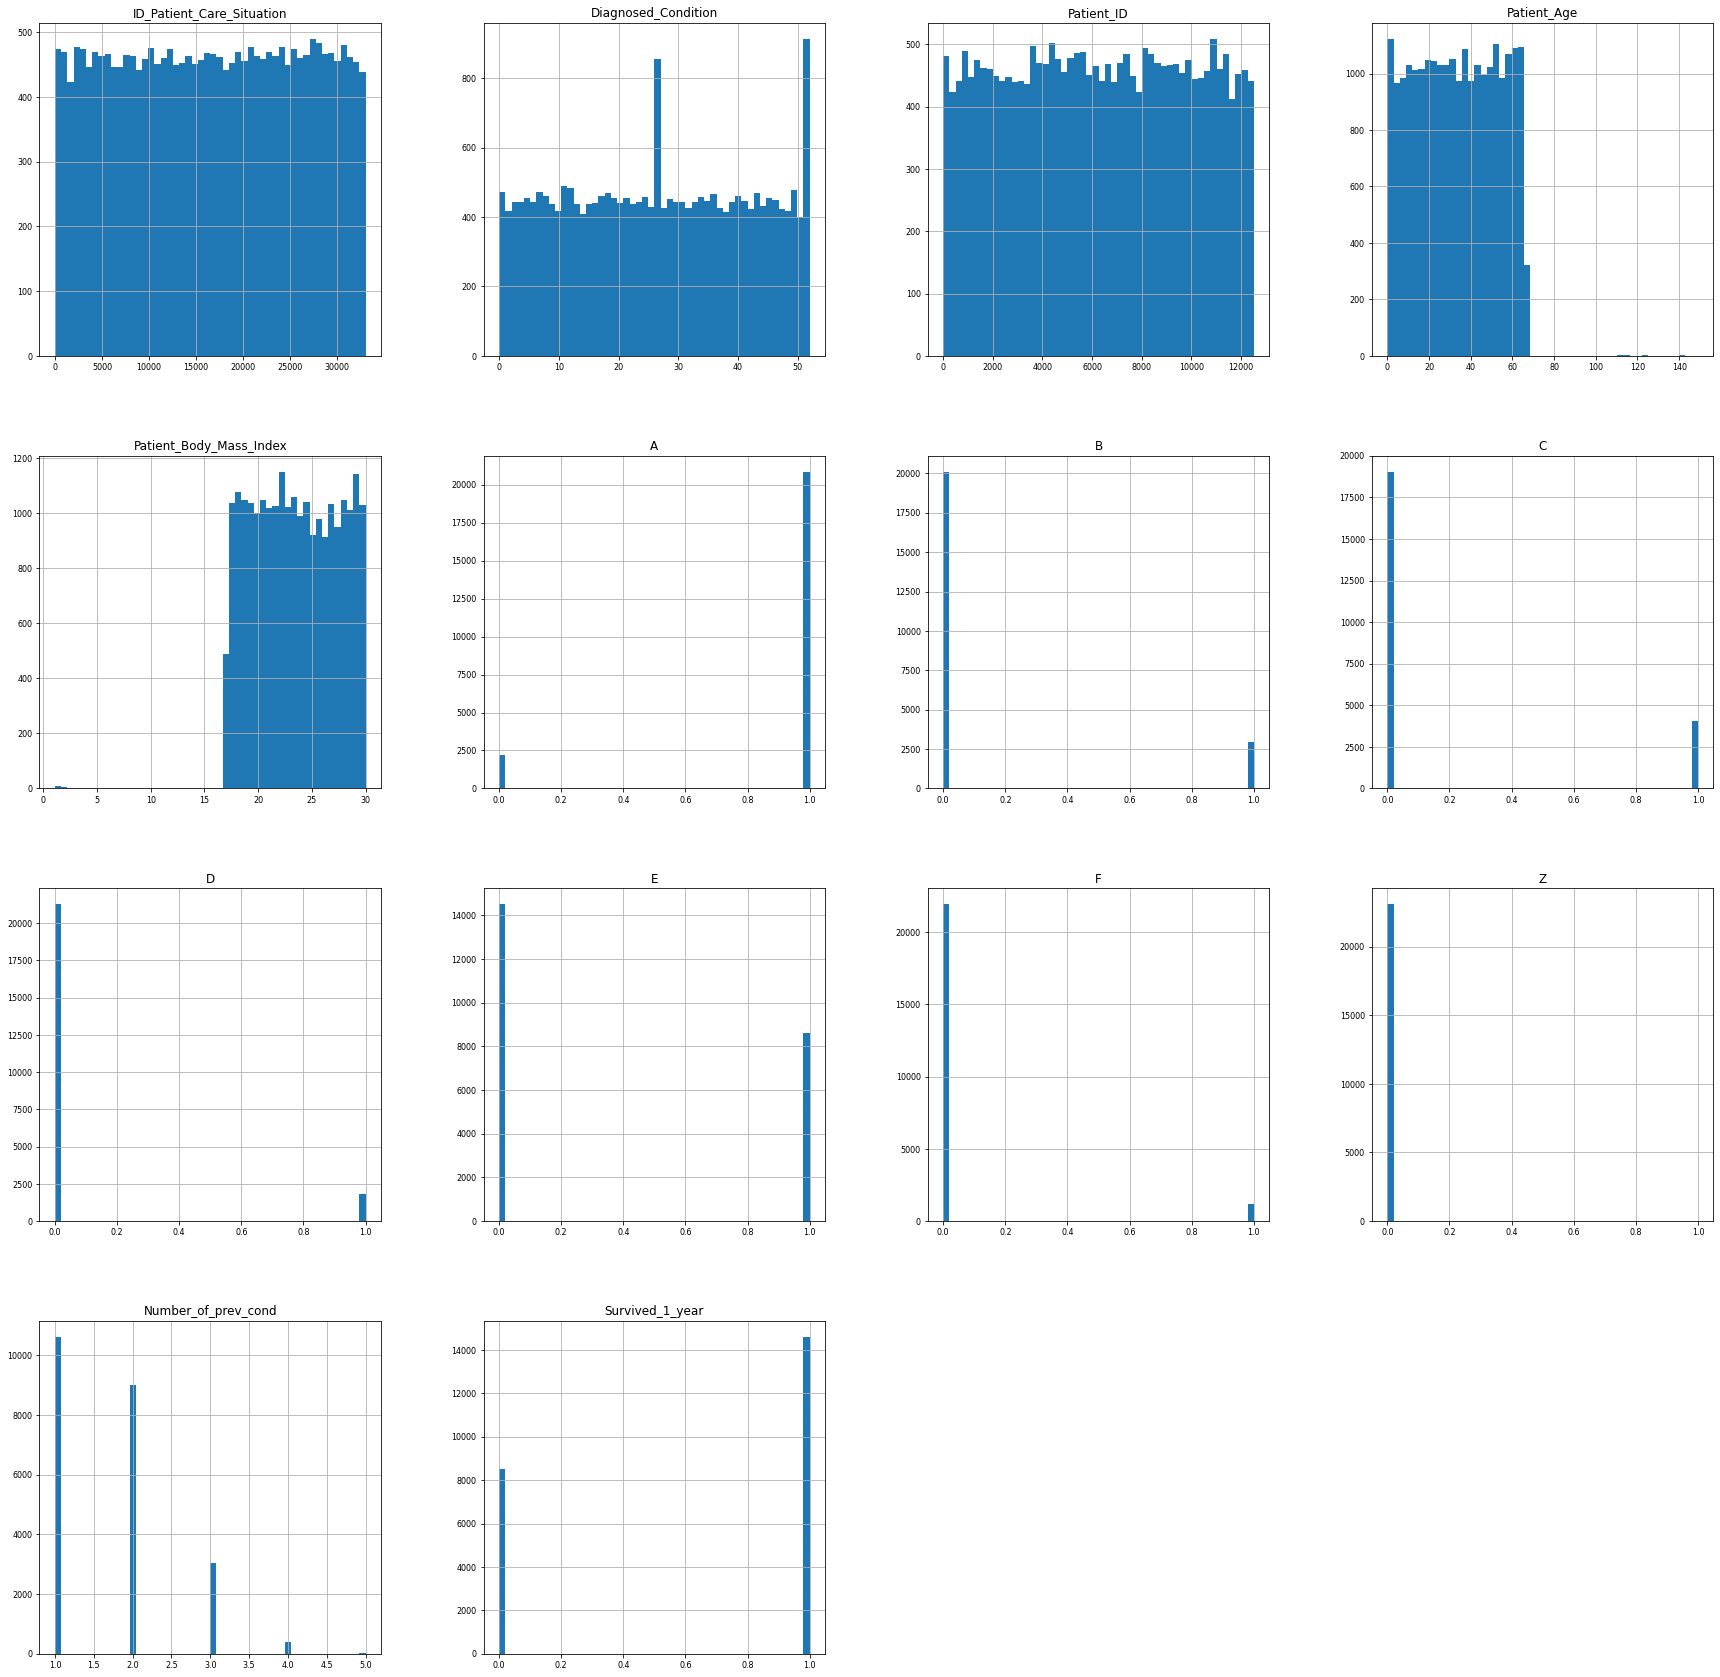

In [12]:
df.hist(figsize=(30,30), bins=50, xlabelsize=8, ylabelsize=8)

In [13]:
#Age greater than 100 is not normal
df=df[df['Patient_Age']<100]
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [14]:
df[df['Patient_Smoker']=='Cannot say']

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year


In [15]:
#Creating dummy variables
drugs = df['Treated_with_drugs'].str.get_dummies(sep=' ') #as there are people who used more than one drugs
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
5,0,0,0,0,0,1


In [16]:
df = pd.concat([df, drugs], axis=1)     
df = df.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columnsb

In [17]:
df = pd.get_dummies(df, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23096
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23084 non-null  int64  
 1   Diagnosed_Condition        23084 non-null  int64  
 2   Patient_ID                 23084 non-null  int64  
 3   Patient_Age                23084 non-null  int64  
 4   Patient_Body_Mass_Index    23084 non-null  float64
 5   Patient_mental_condition   23084 non-null  object 
 6   A                          23084 non-null  float64
 7   B                          23084 non-null  float64
 8   C                          23084 non-null  float64
 9   D                          23084 non-null  float64
 10  E                          23084 non-null  float64
 11  F                          23084 non-null  float64
 12  Z                          23084 non-null  float64
 13  Number_of_prev_cond        23084 non-null  flo

In [19]:
df = df.drop(['Patient_ID'], axis = 1)

In [20]:
#Patient_mental_condition has only stable entry
df.drop('Patient_mental_condition', axis = 1, inplace=True)
#every value is unique
df = df.drop(['ID_Patient_Care_Situation'], axis = 1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23096
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        23084 non-null  int64  
 1   Patient_Age                23084 non-null  int64  
 2   Patient_Body_Mass_Index    23084 non-null  float64
 3   A                          23084 non-null  float64
 4   B                          23084 non-null  float64
 5   C                          23084 non-null  float64
 6   D                          23084 non-null  float64
 7   E                          23084 non-null  float64
 8   F                          23084 non-null  float64
 9   Z                          23084 non-null  float64
 10  Number_of_prev_cond        23084 non-null  float64
 11  Survived_1_year            23084 non-null  int64  
 12  DX1                        23084 non-null  int64  
 13  DX2                        23084 non-null  int

In [22]:
df.shape

(23084, 22)

In [23]:
# Seperating dependent and independent column
X =  df.loc[:, df.columns != 'Survived_1_year']
y = df.loc[:, df.columns == 'Survived_1_year']

In [24]:
# For Preprocessing, ML models and Evaluation train test splitb
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18467 entries, 21326 to 237
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        18467 non-null  int64  
 1   Patient_Age                18467 non-null  int64  
 2   Patient_Body_Mass_Index    18467 non-null  float64
 3   A                          18467 non-null  float64
 4   B                          18467 non-null  float64
 5   C                          18467 non-null  float64
 6   D                          18467 non-null  float64
 7   E                          18467 non-null  float64
 8   F                          18467 non-null  float64
 9   Z                          18467 non-null  float64
 10  Number_of_prev_cond        18467 non-null  float64
 11  DX1                        18467 non-null  int64  
 12  DX2                        18467 non-null  int64  
 13  DX3                        18467 non-null  i

In [26]:
#model building
from sklearn.linear_model import LogisticRegression     # Logistic regression model

Lr = LogisticRegression(max_iter = 1000)
Lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
Lr_pred = Lr.predict(X_test)
Lr_pred

array([1, 0, 1, ..., 1, 0, 0])

In [29]:
from sklearn.metrics import f1_score    # for evaluation

print(f1_score(y_test,Lr_pred))

0.8046085858585859


Random Forest

In [30]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [31]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [32]:
y_pred = forest.predict(X_test)

fscore = f1_score(y_test ,y_pred)
fscore

0.8366483946750196

Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1, max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [34]:
y_pred = dt.predict(X_test)
dtscore=f1_score(y_test,y_pred)
dtscore

0.8207117557766909

# TEST DATA

In [35]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv")
test_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,DX6,28,29.106314,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,15598,7,6273,DX1,4,20.616673,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,11885,16,11473,DX1 DX3 DX4 DX5,20,24.727357,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,25101,50,5681,DX4,33,17.517426,NO,URBAN,Stable,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


In [36]:
df_t = test_data.copy()
df_t

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,DX6,28,29.106314,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,15598,7,6273,DX1,4,20.616673,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,11885,16,11473,DX1 DX3 DX4 DX5,20,24.727357,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,25101,50,5681,DX4,33,17.517426,NO,URBAN,Stable,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


In [ ]:
df_t.info()

In [38]:
df_t.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond
count,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.0,9303.000000
mean,16392.542943,26.680426,6226.311620,33.249059,23.429321,0.893260,0.142320,0.183167,0.087284,0.399441,0.052886,0.0,1.758358
std,9531.750578,15.097842,3634.312461,19.477920,3.769305,0.308799,0.349396,0.386824,0.282265,0.489810,0.223818,0.0,0.771230
min,1.000000,1.000000,3.000000,0.000000,17.000695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,8133.000000,14.000000,3073.500000,17.000000,20.166849,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,16281.000000,27.000000,6246.000000,33.000000,23.392495,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000
75%,24588.500000,40.000000,9424.000000,50.000000,26.726929,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.000000
max,32975.000000,52.000000,12500.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,5.000000


In [39]:
df_t.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [40]:
df_t = df_t.drop(['Patient_ID'], axis = 1)

In [41]:
drugs_t = df_t['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
drugs_t.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,1,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0


In [42]:
df_t = pd.concat([df_t, drugs_t], axis=1)     # concat the two dataframes 'drugs' and 'data'
df_t = df_t.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columns

df_t.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,40,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,0,0
1,23216,52,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,1
2,11890,50,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,1,1,0
3,7149,32,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,1
4,22845,20,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0


In [43]:
df_t = pd.get_dummies(df_t, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [44]:
#Patient_mental_condition has only stable entry
df_t.drop('Patient_mental_condition', axis = 1, inplace=True)
df_t

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,19150,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,0,0,1,0,1,0
1,23216,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,1,1,0,0,1
2,11890,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,1,1,0,1,0,1,0
3,7149,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,1,1,0,0,1
4,22845,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,28,29.106314,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,1,1,0,1,0
9299,15598,7,4,20.616673,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,0,0,0,1,0,0,1
9300,11885,16,20,24.727357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,1,0,0,1,0,1
9301,25101,50,33,17.517426,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,0,0,0,1,0,0,1,0,0,1


In [45]:
df_t = df_t.drop(['ID_Patient_Care_Situation'], axis = 1)

In [46]:
df_t

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,0,0,1,0,1,0
1,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,1,1,0,0,1
2,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,1,1,0,1,0,1,0
3,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,1,1,0,0,1
4,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,11,28,29.106314,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,1,1,0,1,0
9299,7,4,20.616673,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,0,0,0,1,0,0,1
9300,16,20,24.727357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,1,0,0,1,0,1
9301,50,33,17.517426,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,0,0,0,1,0,0,1,0,0,1


In [47]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        9303 non-null   int64  
 1   Patient_Age                9303 non-null   int64  
 2   Patient_Body_Mass_Index    9303 non-null   float64
 3   A                          9303 non-null   float64
 4   B                          9303 non-null   float64
 5   C                          9303 non-null   float64
 6   D                          9303 non-null   float64
 7   E                          9303 non-null   float64
 8   F                          9303 non-null   float64
 9   Z                          9303 non-null   float64
 10  Number_of_prev_cond        9303 non-null   float64
 11  DX1                        9303 non-null   int64  
 12  DX2                        9303 non-null   int64  
 13  DX3                        9303 non-null   int64

In [48]:
prediction = forest.predict(df_t)
prediction

array([1, 1, 1, ..., 1, 1, 0])

In [49]:
Survived_1_year = pd.DataFrame(prediction)
Survived_1_year

,0
0,1
1,1
2,1
3,0
4,1
...,...
9298,0
9299,1
9300,1
9301,1
